# Aufgabenteil 3

Definition der Differentialgleichung

In [1]:
from sympy import *
u = Function('u')
var('x g')
equ = Eq(-diff(u(x),x,x), -g)
display(equ)

Eq(-Derivative(u(x), (x, 2)), -g)

Lösung der Differentialgleichung

In [2]:
sol = dsolve(equ.subs({g: 10}), u(x), ics = {u(0): 0, u(1): 0})
display(sol)

Eq(u(x), 5*x**2 - 5*x)

Darstellung der Lösung

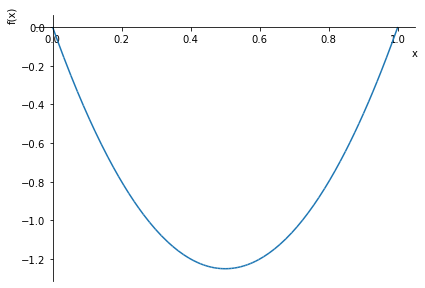

In [3]:
f = sol.rhs
plotting.plot(f, (x,0,1));

# Aufgabenteil 4

Definition der Differenzenquotienten

In [4]:
def vdiff(u,x,h):
    return (u(x+h)-u(x))/h

def rdiff(u,x,h):
    return (u(x)-u(x-h))/h

def diff2Ord(u,x,h):
    return vdiff(u,rdiff(u,x,h),h)

Erzeugung des Gitters

In [5]:
import numpy as np
N = 100
h = 1/N
x = np.arange(0,1,h)

Lösung des LGS

In [6]:
from scipy.linalg import solve
M = (N**2) * (2*np.eye(N,N) - np.diag(np.ones(N-1),1) - np.diag(np.ones(N-1),-1))
g = [-10] * N
g[0], g[N-1] = 0, 0
u = solve(M,g)

# Aufgabenteil 5

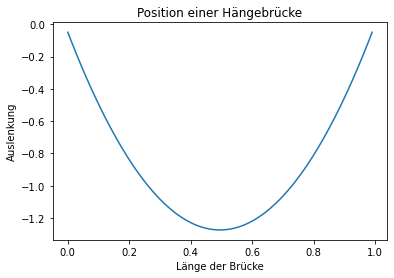

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Länge der Brücke')
plt.ylabel('Auslenkung')
plt.title('Position einer Hängebrücke')
plt.plot(x,u);

# Aufgabenteil 6

Symbolische Lösung aus Aufgabe 3 war $5x^2 - 5x$. Diese geben wir ein.

In [8]:
f = 5*x**2 - 5*x
differenzen = abs(u - f)

Berechnung der $l^2$-Norm des Fehlers

In [9]:
np.linalg.norm(differenzen)

0.28220116938095985

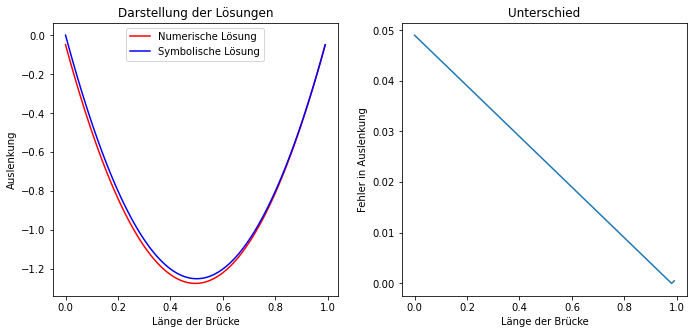

In [10]:
fig = plt.figure()
funktionen = fig.add_subplot(121)
funktionen.plot(x, u, 'r', label='Numerische Lösung')
funktionen.plot(x, f, 'b', label='Symbolische Lösung')
funktionen.set_xlabel('Länge der Brücke')
funktionen.set_ylabel('Auslenkung')
funktionen.set_title('Darstellung der Lösungen')
funktionen.legend(loc = 'best');

fehler = fig.add_subplot(122)
fehler.set_title('Unterschied')
fehler.set_xlabel('Länge der Brücke')
fehler.set_ylabel('Fehler in Auslenkung')
fehler.plot(x,differenzen)

fig.set_size_inches(10,5)
fig.tight_layout(pad=2.);